EAE3709 Aplicaciones de Machine Learning en Economía <br>
Primer Semestre 2025

Instituto de Economía<br>
Pontificia Universidad Católica de Chile
# Proyecto Final: “¿Existen perfiles similares de bienestar subjetivo que comparten los países de la OCDE?”
- Autores:
    - Valentina Flores  [vale.flores@uc.cl]
    - Ignacio Maluenda  [limaluenda@uc.cl]
    - Constanza Muñoz  [camunoz52@uc.cl]
    
- Fecha: [28 de mayo, 2025]
__________________________________________________________

## Descripción del proyecto

El concepto de bienestar subjetivo, entendido como la percepción individual sobre la calidad de vida, ha ganado relevancia en las últimas décadas como un indicador clave del desarrollo social, complementario a las métricas económicas tradicionales como el Producto Interno Bruto per cárpita (PIB) . En este estudio, se aplican técnicas de Machine Learning bajo un contexto de aprendizaje no supervisado para evaluar si es posible encontrar relaciones entre los países según el nivel de bienestar utilizando el "Better Life Index"  de la OCDE, este recopila indicadores objetivos por país —como ingreso, salud, educación, empleo, vivienda y seguridad — con lo que se construye una medida subjetiva de satisfacción de vida. Esto podría aportarnos información valiosa para la formulación de políticas públicas y el análisis comparado del desarrollo social.
Resumen:
- Área(s) de aplicación: Economía (Desarrollo económico y economía del bienestar), políticas públicas  .
- Tipo de aprendizaje: No supervisado.
- Tipo de problema: Clustering.
- Fuente principal: OCDE Better Life Index (2024). https://www.oecdregionalwellbeing.org/ 
- Variable objetivo: No aplica. 
- Atributos explicativos principales: ingresos, empleo, educación, salud, balance vida-trabajo, medio ambiente, seguridad, compromiso cívico, conexiones sociales.
- Número estimado de observaciones totales: 38 países y sus regiones (miembros OCDE y asociados). En total son 6248 observaciones. 


## Contenido
1. [Pre-procesamiento](#seccion1)
2. [Análisis Exploratorio de Datos (EDA](#seccion2)
3. [Feature Engineering](#seccion3)
4. [Entrenamiento](#seccion4)
5. [Evaluación](#seccion5)
__________________________________________________________

## 1. Pre-procesamiento <a name="seccion1"></a>
Incluir en esta sección:
- Importación de librerías principales
- Carga del data frame
- Integración con otros sets de datos (si aplica)
- Descripción inicial de las columnas:
    - tipo de datos
    - evaluar presencia de missings y outliers
- Construcción de la variable objetivo o target (si aplica)

In [ ]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#carga de dataframe
url = "https://raw.githubusercontent.com/constanzaamunoz/Proyecto-clustering/main/dataset.csv"
df = pd.read_csv(url)
df


,Country,Region,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction
0,Australia,New South Wales,AU1,8.5,8.2,5.7,9.8,9.5,7.6,10.0,5.4,7.9,8.9,8.5
1,Australia,Victoria,AU2,8.5,8.4,4.6,9.8,9.9,8.3,10.0,5.5,9.6,8.9,8.8
2,Australia,Queensland,AU3,8.2,8.3,5.0,9.8,9.2,9.3,10.0,5.3,7.9,7.1,8.1
3,Australia,South Australia,AU4,7.6,8.1,5.3,9.9,9.1,9.6,10.0,4.9,7.9,8.4,8.5
4,Australia,Western Australia,AU5,8.2,8.9,5.9,9.8,9.6,8.5,10.0,5.2,9.6,7.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,United States,Virginia,US51,9.5,8.3,9.3,8.4,5.1,9.1,6.6,8.5,9.4,8.3,6.2
443,United States,Washington,US53,9.5,7.6,10.0,9.0,6.1,9.4,7.2,8.0,8.1,7.3,8.1
444,United States,West Virginia,US54,9.2,7.0,6.6,8.3,0.7,9.0,3.1,7.2,10.0,10.0,8.1
445,United States,Wisconsin,US55,9.8,9.0,8.3,8.6,4.8,8.6,7.2,7.5,10.0,8.7,8.5


In [ ]:
#carga de dataframe modificada manualmente
url_excel = "https://raw.githubusercontent.com/constanzaamunoz/Proyecto-clustering/main/dataset.xlsx"
df_mod = pd.read_excel(url_excel, sheet_name=2)
df_mod

,Country,Region,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction
0,Australia,New South Wales,AU1,8.5,8.2,5.7,9.8,9.5,7.6,10.0,5.4,7.9,8.9,8.5
1,Australia,Victoria,AU2,8.5,8.4,4.6,9.8,9.9,8.3,10.0,5.5,9.6,8.9,8.8
2,Australia,Queensland,AU3,8.2,8.3,5.0,9.8,9.2,9.3,10.0,5.3,7.9,7.1,8.1
3,Australia,South Australia,AU4,7.6,8.1,5.3,9.9,9.1,9.6,10.0,4.9,7.9,8.4,8.5
4,Australia,Western Australia,AU5,8.2,8.9,5.9,9.8,9.6,8.5,10.0,5.2,9.6,7.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,United States,Virginia,US51,9.5,8.3,9.3,8.4,5.1,9.1,6.6,8.5,9.4,8.3,6.2
443,United States,Washington,US53,9.5,7.6,10.0,9.0,6.1,9.4,7.2,8.0,8.1,7.3,8.1
444,United States,West Virginia,US54,9.2,7.0,6.6,8.3,0.7,9.0,3.1,7.2,10.0,10.0,8.1
445,United States,Wisconsin,US55,9.8,9.0,8.3,8.6,4.8,8.6,7.2,7.5,10.0,8.7,8.5


--------

La base de datos utilizada proviene del OECD Regional Well-Being Index que incluye información de más de 400 regiones pertenecientes a países miembros de la OCDE. Cada observación representa una región identificada por el país, el nombre de la región. La base contiene 11 indicadores normalizados entre 0 y 10 que miden dimensiones clave del bienestar objetivo, además de una medida subjetiva de bienestar general calculada por la organización.

Los indicadores incluidos son:

* Education: Nivel educativo promedio, medido como la proporción de adultos con al menos educación secundaria.

* Jobs: Indicador del mercado laboral, que considera tasas de empleo y desempleo.

* Income: Ingreso disponible per cápita ajustado por paridad de poder de compra.

* Safety: Nivel de seguridad, aproximado por la tasa de homicidios.

* Health: Esperanza de vida al nacer, como proxy del estado de salud.

* Environment: Calidad del aire medida por concentración de material particulado fino.

* Civic engagement: Participación electoral como medida de compromiso cívico.

* Accessiblity to services: Porcentaje de hogares con acceso a internet de banda ancha.

* Housing: Indicador de condiciones de vivienda.

* Community: Nivel de apoyo social percibido.

* Life satisfaction: Medida subjetiva de satisfacción con la vida.

Estas variables buscan representar múltiples dimensiones del bienestar de forma comparable entre regiones.

-------

<ipython-input-4-043eb77c74f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Valor', y='Variable', orient='h', palette="Set2")


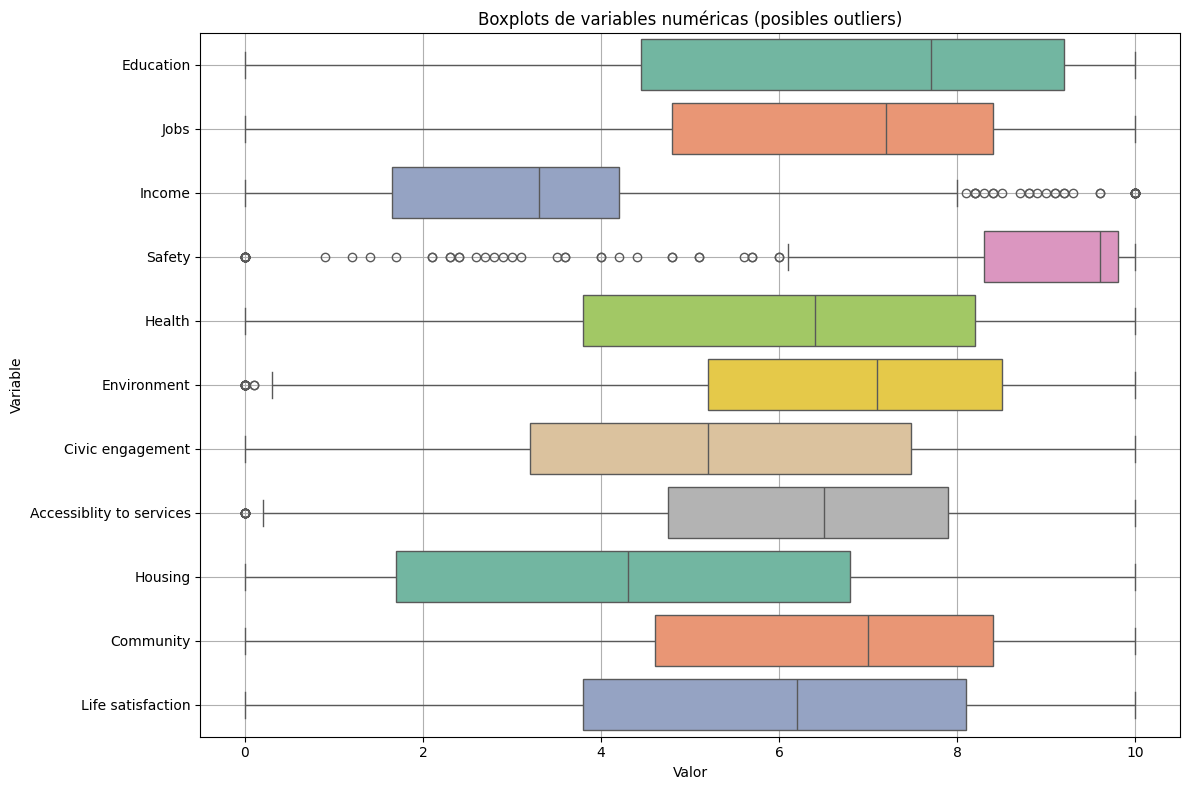

In [ ]:
df_numeric = df.select_dtypes(include='number')

df_long = df_numeric.melt(var_name='Variable', value_name='Valor')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_long, x='Valor', y='Variable', orient='h', palette="Set2")
plt.title('Boxplots de variables numéricas (posibles outliers)')
plt.xlabel('Valor')
plt.ylabel('Variable')
plt.grid(True)
plt.tight_layout()
plt.show()


--------
Se pueden observar valores atípicos (outliers) en los gráficos de caja. Variables como Income, Safety, Environment y Accesibility to Services tienen outliers. En el caso de Income se puede deber a a la presencia de economías con sgnificativos mayores ingresos. Safety tiene una caja estrecha, por lo que se podría deducir que varios pasíses tienen percepciones similares de seguridad pero tiene muchos valores atípicos en los datos, presenta una gran variabilidad. También nos podría estar indicando una desigualdad atípica en la región

En la siguiente tabla se puede ver un conteo de los datos que faltan por variable. Las que tienen más missing value son las variables de Educación, Trabajo e Ingreso, así que hay varias regiones que no entregaron esa info. Las demás están casi completas dentro de la base de datos, con solo un par de vacíos.

In [ ]:
# Contar missing value

indicadores = df.columns.difference(['Country', 'Region', 'Code'])

missing_values = df[indicadores].isnull().sum()

missing_values[missing_values > 0]

,0
Civic engagement,1
Community,10
Education,24
Housing,3
Income,12
Jobs,15
Life satisfaction,10
Safety,3


## 2. Análisis Exploratorio de Datos <a name="seccion2"></a>
Incluir en esta sección:
- Análisis descriptivo de cada atributo y la variable objetivo
    - Distribución variables contínuas
    - Conteo de presencia de cada estado en variables categóricas
    - Evaluar potencial predictivo de atributos sobre target:
        - Matriz de correlación
        - Distribuciones por clase
- Decisiones de imputación de missings y depuración de outliers

In [ ]:
df[list(indicadores)].describe()

,Accessiblity to services,Civic engagement,Community,Education,Environment,Health,Housing,Income,Jobs,Life satisfaction,Safety
count,447.000000,446.000000,437.000000,423.000000,447.000000,447.000000,444.000000,435.000000,432.000000,437.000000,444.000000
mean,6.092394,5.215919,6.286957,6.589362,6.587919,5.843400,4.499775,3.440690,6.463889,5.931350,8.494820
std,2.279060,2.825214,2.712000,3.113083,2.609922,2.757687,2.954940,2.572726,2.584918,2.760535,2.473625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.750000,3.200000,4.600000,4.450000,5.200000,3.800000,1.700000,1.650000,4.800000,3.800000,8.300000
50%,6.500000,5.200000,7.000000,7.700000,7.100000,6.400000,4.300000,3.300000,7.200000,6.200000,9.600000
75%,7.900000,7.475000,8.400000,9.200000,8.500000,8.200000,6.800000,4.200000,8.400000,8.100000,9.800000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


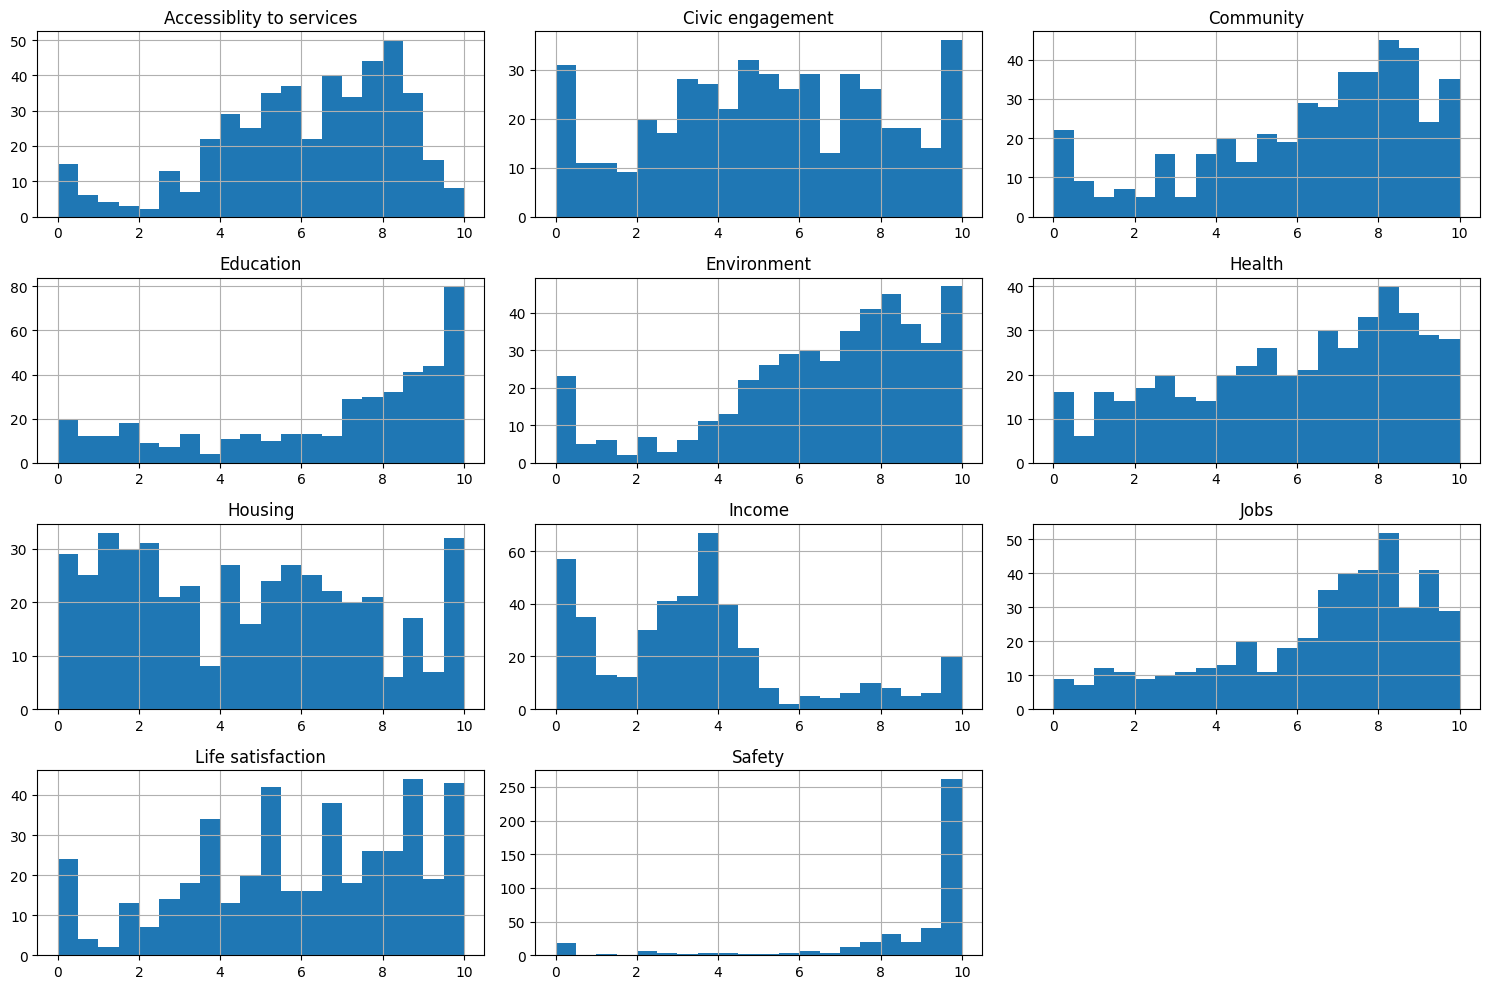

In [ ]:
# Hitogramas
df[list(indicadores)].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

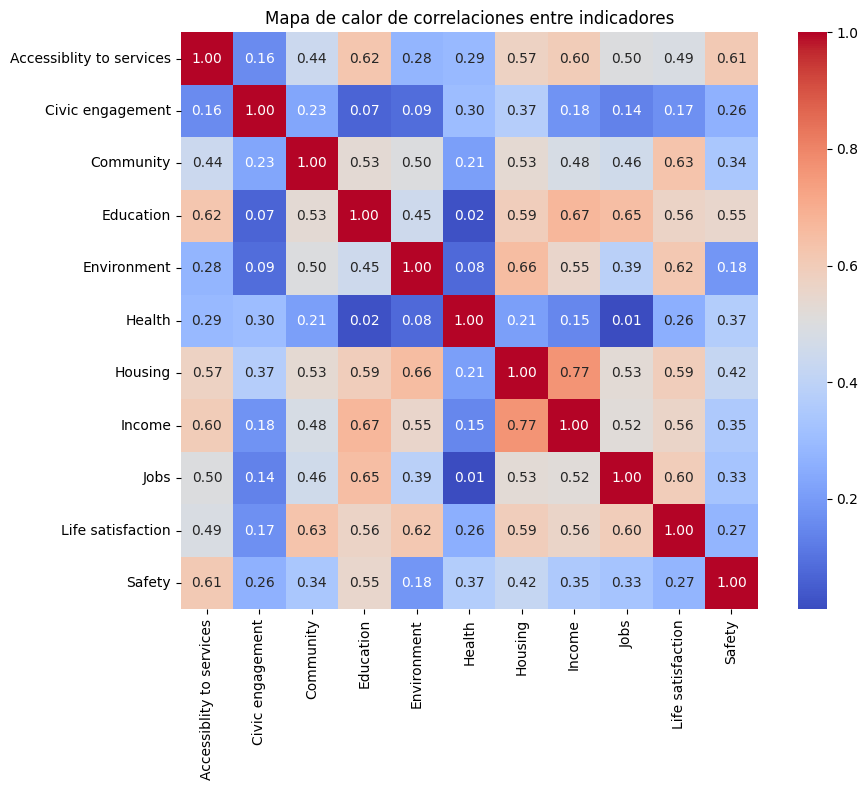

In [ ]:
# Calcular matriz de correlación
correlation_matrix = df[indicadores].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de calor de correlaciones entre indicadores")
plt.tight_layout()
plt.show()


Viendo el mapa de calor, se nota que varias variables están correlacionadas entre sí. Por ejemplo, las variables Educación, Ingreso, Trabajo, Viviendas y Accesibilidad a servicios tienen alta correlación entre ellas, lo que tiene sentido porque todas apuntan a condiciones materiales de vida y correlacionan con la variable “Life Satisfaction”.  

Por eso tiene sentido aplicar un PCA. Al estar algunas variables tan relacionadas, el PCA nos va a ayudar a resumirlas en menos dimensiones sin perder tanta información. Así evitamos que las variables más parecidas “doble contabilizadas” cuando hagamos clustering, y además mantenemos variables como Health o Civic engagement que no están tan correlacionadas y podrían aportar algo distinto.

----------

El Banco Mundial posee dos bases de datos, una con la información por región (sheet 1) y la otra con la información por país (sheet 2). Para los missing values faltantes en algunas regiones decidimos utilizar la información facilitada por la institución, la que corresponde a un promedio con la información que tenían en ese momento. Hay países como Japón e Islandia en donde no existían datos ni por región ni por país, por lo que quedaron como faltantes. Se creó la base de datos modificada manualmente (sheet 3) en la que se incorpora la información de los primeros dos dataset.


---------


In [ ]:
#missing values nueva data modificada
df_mod.isnull().sum() #Primero observamos qué datos tienen missing values.
df_mod.isnull().sum().sort_values(ascending=False)
total_missings = df_mod.isnull().sum().sort_values(ascending=False)
total_missings #observamos el ranking del total de missings por variable.
total_datos = df_mod.isnull().count()
total_datos #observamos el total de datos por variable.
percent_missings = (total_missings/total_datos).sort_values(ascending=False)*100
percent_missings #mostramos los missing values como un % del total de datos por variable.

,0
Education,2.684564
Life satisfaction,2.237136
Housing,0.447427
Code,0.000000
Civic engagement,0.000000
Accessiblity to services,0.000000
Country,0.000000
Community,0.000000
Health,0.000000
Environment,0.000000


In [ ]:
df_mod = df_mod.fillna(df_mod.mean(numeric_only=True)) #reeemplazamos japón e islandia con los valores promedios de las columnas (es decir, ahora estamos usando el promedio mundial)
df_mod.isnull().sum()

,0
Country,0
Region,0
Code,0
Education,0
Jobs,0
Income,0
Safety,0
Health,0
Environment,0
Civic engagement,0


## 3. Feature Engineering <a name="seccion3"></a>
Incluir en esta sección:
- Transformaciones necesarias tanto de atributos como target para su ingesta por parte de algoritmos ML:
    - Estandarización y escalado
    - Bucketization
    - One-hot encoding
    - Técnicas de reducción de dimensionalidad

In [ ]:
df_mod

,Country,Region,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction
0,Australia,New South Wales,AU1,8.5,8.2,5.7,9.8,9.5,7.6,10.0,5.4,7.9,8.9,8.5
1,Australia,Victoria,AU2,8.5,8.4,4.6,9.8,9.9,8.3,10.0,5.5,9.6,8.9,8.8
2,Australia,Queensland,AU3,8.2,8.3,5.0,9.8,9.2,9.3,10.0,5.3,7.9,7.1,8.1
3,Australia,South Australia,AU4,7.6,8.1,5.3,9.9,9.1,9.6,10.0,4.9,7.9,8.4,8.5
4,Australia,Western Australia,AU5,8.2,8.9,5.9,9.8,9.6,8.5,10.0,5.2,9.6,7.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,United States,Virginia,US51,9.5,8.3,9.3,8.4,5.1,9.1,6.6,8.5,9.4,8.3,6.2
443,United States,Washington,US53,9.5,7.6,10.0,9.0,6.1,9.4,7.2,8.0,8.1,7.3,8.1
444,United States,West Virginia,US54,9.2,7.0,6.6,8.3,0.7,9.0,3.1,7.2,10.0,10.0,8.1
445,United States,Wisconsin,US55,9.8,9.0,8.3,8.6,4.8,8.6,7.2,7.5,10.0,8.7,8.5


In [ ]:
#Escalado de variable nueva
from sklearn.preprocessing import StandardScaler

variables_correlacionadas = ['Education', 'Income', 'Jobs', 'Housing', 'Accessiblity to services']
print("Missing values before scaling:")
print(df_mod[variables_correlacionadas].isnull().sum())
df_mod = df_mod.fillna(df_mod.mean(numeric_only=True))
print("\nMissing values after filling and before scaling:")
print(df_mod[variables_correlacionadas].isnull().sum())
scaler = StandardScaler()
X_sub = scaler.fit_transform(df_mod[variables_correlacionadas])


Missing values before scaling:
Education                   0
Income                      0
Jobs                        0
Housing                     0
Accessiblity to services    0
dtype: int64

Missing values after filling and before scaling:
Education                   0
Income                      0
Jobs                        0
Housing                     0
Accessiblity to services    0
dtype: int64


In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_sub)
df_mod['PCA_material'] = X_pca

In [ ]:
# juntamos variables
otras_variables = ['Health', 'Community', 'Civic engagement', 'Safety']
df_final = df_mod[['Country', 'Region', 'Code', 'PCA_material'] + otras_variables]


In [ ]:
df_final.describe()

,PCA_material,Health,Community,Civic engagement,Safety
count,447.000000,447.000000,447.000000,447.000000,447.000000
mean,0.000000,5.843400,6.308501,5.205145,8.484116
std,1.857629,2.757687,2.703198,2.831223,2.473336
min,-3.725928,0.000000,0.000000,0.000000,0.000000
25%,-1.513963,3.800000,4.600000,3.200000,8.300000
50%,0.508730,6.400000,7.000000,5.200000,9.600000
75%,1.217282,8.200000,8.400000,7.450000,9.800000
max,3.494282,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Dataframe final estandarizar el resto de variables
df_cluster = df_final.drop(columns=['Country', 'Region', 'Code'])
scaler_total = StandardScaler()
X_sca = scaler_total.fit_transform(df_cluster)
df_f1 = pd.DataFrame(X_sca, columns=df_cluster.columns)
df_f1[['Country', 'Region', 'Code']] = df_final[['Country', 'Region', 'Code']].reset_index(drop=True)


,PCA_material,Health,Community,Civic engagement,Safety
count,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02
mean,1.589581e-17,-1.589581e-16,-1.828018e-16,-1.013358e-16,4.172650e-16
std,1.001120e+00,1.001120e+00,1.001120e+00,1.001120e+00,1.001120e+00
min,-2.007991e+00,-2.121324e+00,-2.336332e+00,-1.840539e+00,-3.434075e+00
25%,-8.159108e-01,-7.418136e-01,-6.327376e-01,-7.090193e-01,-7.452388e-02
50%,2.741667e-01,2.020618e-01,2.560943e-01,-1.819418e-03,4.516709e-01
75%,6.560220e-01,8.555140e-01,7.745796e-01,7.937805e-01,5.326239e-01
max,1.883151e+00,1.508966e+00,1.367134e+00,1.695460e+00,6.135769e-01


In [ ]:
df_f1

,PCA_material,Health,Community,Civic engagement,Safety,Country,Region,Code
0,0.757251,1.327452,0.959753,1.695460,0.532624,Australia,New South Wales,AU1
1,0.817972,1.472663,0.959753,1.695460,0.532624,Australia,Victoria,AU2
2,0.662358,1.218543,0.293129,1.695460,0.532624,Australia,Queensland,AU3
3,0.585632,1.182240,0.774580,1.695460,0.573100,Australia,South Australia,AU4
4,0.933773,1.363755,0.478302,1.695460,0.532624,Australia,Western Australia,AU5
...,...,...,...,...,...,...,...,...
442,1.641667,-0.269876,0.737545,0.493221,-0.034047,United States,Virginia,US51
443,1.491710,0.093153,0.367198,0.705380,0.208812,United States,Washington,US53
444,1.158707,-1.867204,1.367134,-0.744379,-0.074524,United States,West Virginia,US54
445,1.575446,-0.378785,0.885684,0.705380,0.046906,United States,Wisconsin,US55


## 4. Entrenamiento <a name="seccion4"></a>
Incluir en esta sección:
- Train/test split
- Balanceo de clases (si aplica)
- Definición de la(s) métrica(s) de perfomance que se utilizará(n)
- Grid search
- Entrenamiento de modelos

In [ ]:
# Inicie cada celda con un comentario

## 5. Evaluación <a name="seccion5"></a>
Incluir en esta sección:
- Métricas de performance de los mejores modelos encontrados a partir del grid search
- Tiempos de cómputo
- Matriz de confusión (si aplica)

In [ ]:
# Inicie cada celda con un comentario

## 6. Explicabilidad e interpretabilidad <a name="seccion6"></a>
Incluir en esta sección:
- Importancia de los atributos
- Aplicación de métodos como SHAP values o LIME

In [ ]:
# Inicie cada celda con un comentario